# Model Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Revanth\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


###   2. Load Test Data and Model 

In [2]:
# Load processed test data
X_test = pd.read_csv('../../data/processed/X_test_scaled.csv')
y_test = pd.read_csv('../../data/processed/y_test.csv').squeeze()

# Load trained model
with open('../../src/models/xgb_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load label map
with open('../../src/models/label_map.pkl', 'rb') as f:
    reverse_map = pickle.load(f)

### 3. Make Predictions



In [3]:
print("Loaded Model: Tuned XGBoost Classifier")

# Continue with prediction...
y_pred_encoded = model.predict(X_test)
y_pred = pd.Series(y_pred_encoded).map(reverse_map)

Loaded Model: Tuned XGBoost Classifier


### 5. Evaluate Model Performance



 Classification Report:

              precision    recall  f1-score   support

           2       0.79      0.85      0.81        39
           3       0.94      0.95      0.95       175
           4       0.95      0.81      0.88        26

    accuracy                           0.92       240
   macro avg       0.89      0.87      0.88       240
weighted avg       0.92      0.92      0.92       240



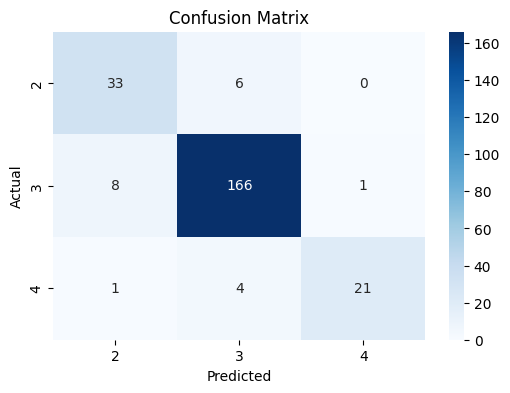

In [4]:
# Classification report
print(" Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[2, 3, 4])
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[2, 3, 4], yticklabels=[2, 3, 4])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [5]:
# Show sample predictions
sample_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.values})
print("\n Sample Predictions:")
print(sample_df.sample(10).reset_index(drop=True))



 Sample Predictions:
   Actual  Predicted
0       2          3
1       3          3
2       4          4
3       3          3
4       3          3
5       3          3
6       3          3
7       3          3
8       4          4
9       3          3
